In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
import pmdarima as pm
from pmdarima.model_selection import train_test_split
%matplotlib inline

In [3]:
data = pd.read_excel('day1Data.xlsm')
data.describe()

,V1 (V),V2 (V),V3 (V),L1 (A),L2 (A),L3 (A),Active Power (kW),Apparent Power (kVA),PFavg,MWH Export Total (kWh),MWH Import Total (kWh),Frequency (Hz)
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.00000,1440.000000,1440.000000,1.440000e+03,1440.000000,1440.000000
mean,19096.626708,19265.390681,19215.642306,5.255000,4.901819,5.321931,-296.53075,300.965292,0.898431,3.005139e+07,34704.409722,49.976060
std,374.212686,379.494024,343.547447,5.339455,5.308014,5.615441,327.92421,324.503623,0.391867,2.274684e+03,18.181738,0.091946
min,18355.260000,18525.480000,18558.130000,0.260000,0.110000,0.070000,-2089.44000,6.020000,-0.999000,3.004788e+07,34680.000000,49.510000
25%,18836.862500,18991.052500,18949.337500,2.310000,1.937500,2.187500,-333.72750,121.457500,0.992000,3.004939e+07,34680.000000,49.954000
50%,19090.535000,19269.235000,19226.085000,3.780000,3.390000,3.740000,-207.57000,208.790000,0.996000,3.005084e+07,34720.000000,49.999000
75%,19309.030000,19474.947500,19429.075000,5.935000,5.502500,5.952500,-120.68500,334.620000,0.997000,3.005406e+07,34720.000000,50.028000
max,20230.010000,20465.490000,20257.660000,34.480000,34.260000,35.580000,46.78000,2089.480000,1.000000,3.005502e+07,34720.000000,50.168000


In [4]:
data.head()


,Polling Time (HH:MM),V1 (V),V2 (V),V3 (V),L1 (A),L2 (A),L3 (A),Active Power (kW),Apparent Power (kVA),PFavg,MWH Export Total (kWh),MWH Import Total (kWh),Frequency (Hz)
0,00:00:00,18990.56,19177.38,19132.85,6.86,6.40,6.75,-380.82,381.99,0.996,30047880.0,34680.0,50.035
1,00:01:00,18994.40,19178.66,19133.08,6.40,5.96,6.31,-355.28,356.40,0.996,30047890.0,34680.0,50.018
2,00:02:00,19014.46,19188.68,19144.29,5.58,5.17,5.50,-309.18,310.27,0.996,30047890.0,34680.0,50.013
3,00:03:00,18982.16,19159.98,19121.69,5.14,4.70,5.03,-282.31,283.35,0.996,30047900.0,34680.0,49.973
4,00:04:00,19013.46,19191.52,19141.65,5.37,4.94,5.29,-296.97,297.99,0.996,30047900.0,34680.0,49.991


In [5]:
rng = pd.date_range('2021-09-24', periods=1440, freq='T')
timestamp = pd.DataFrame({'Timestamp':rng})
timestamp.head()

,Timestamp
0,2021-09-24 00:00:00
1,2021-09-24 00:01:00
2,2021-09-24 00:02:00
3,2021-09-24 00:03:00
4,2021-09-24 00:04:00


In [6]:
df = pd.DataFrame(data, columns = ['MWH Export Total (kWh)'])
df.head()
print(df.isnull().sum())

MWH Export Total (kWh)    0
dtype: int64


In [7]:
df['Timestamp'] = rng
df.head()

,MWH Export Total (kWh),Timestamp
0,30047880.0,2021-09-24 00:00:00
1,30047890.0,2021-09-24 00:01:00
2,30047890.0,2021-09-24 00:02:00
3,30047900.0,2021-09-24 00:03:00
4,30047900.0,2021-09-24 00:04:00


In [8]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp',inplace=True)
print(df[:])

                     MWH Export Total (kWh)
Timestamp                                  
2021-09-24 00:00:00              30047880.0
2021-09-24 00:01:00              30047890.0
2021-09-24 00:02:00              30047890.0
2021-09-24 00:03:00              30047900.0
2021-09-24 00:04:00              30047900.0
...                                     ...
2021-09-24 23:55:00              30055000.0
2021-09-24 23:56:00              30055000.0
2021-09-24 23:57:00              30055010.0
2021-09-24 23:58:00              30055010.0
2021-09-24 23:59:00              30055020.0

[1440 rows x 1 columns]


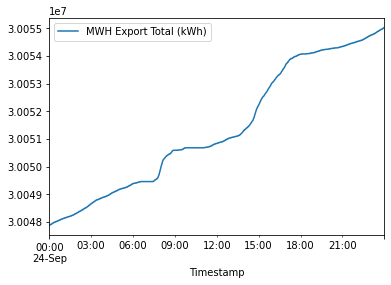

In [9]:
df.plot()
plt.show()

In [10]:
adf_test = pm.arima.ADFTest(alpha = 0.05)
adf_test.should_diff(df)

(0.489334449167501, True)

In [11]:
train, test = train_test_split(df, train_size=1320)

In [12]:
test.index

DatetimeIndex(['2021-09-24 22:00:00', '2021-09-24 22:01:00',
               '2021-09-24 22:02:00', '2021-09-24 22:03:00',
               '2021-09-24 22:04:00', '2021-09-24 22:05:00',
               '2021-09-24 22:06:00', '2021-09-24 22:07:00',
               '2021-09-24 22:08:00', '2021-09-24 22:09:00',
               ...
               '2021-09-24 23:50:00', '2021-09-24 23:51:00',
               '2021-09-24 23:52:00', '2021-09-24 23:53:00',
               '2021-09-24 23:54:00', '2021-09-24 23:55:00',
               '2021-09-24 23:56:00', '2021-09-24 23:57:00',
               '2021-09-24 23:58:00', '2021-09-24 23:59:00'],
              dtype='datetime64[ns]', name='Timestamp', length=120, freq=None)

In [13]:
model = pm.auto_arima(train, seasonal=True, start_p=0, d =1 , start_q=0, max_p=8,max_d=8, max_q=8, start_P=0,D=1,start_Q=0,max_P=8,max_D=8,max_Q=8,error_action='warn', trace=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8854.576, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8843.078, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8843.463, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9408.557, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8835.564, Time=0.84 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8814.238, Time=1.03 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=8806.063, Time=1.51 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=8788.950, Time=1.07 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=8782.781, Time=1.70 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=8777.011, Time=1.93 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=8763.085, Time=2.43 sec
 ARIMA(8,1,1)(0,0,0)[0] intercept   : AIC=8673.469, Time=4.81 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=8671.930, Time=2.89 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=8670.334, Time=2.76 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1320
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4328.168
Date:                Mon, 21 Mar 2022   AIC                           8664.336
Time:                        17:36:37   BIC                           8685.075
Sample:                             0   HQIC                          8672.112
                               - 1320                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1713      0.028      6.205      0.000       0.117       0.225
ar.L1          0.9615      0.005    213.108      0.000       0.953       0.970
ma.L1         -0.9425      0.005   -180.933      0.000      -0.953      -0.932
sigma2        33.4370      1.052     31.787      0.000      31.375      35.499
===================================================================================
Ljung-Box (L1) (Q):                 164.80   Jarque-Bera (JB):               890.78
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                             1.14
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
preds = model.predict(test.shape[0])
preds = pd.DataFrame(preds)
preds['Timestamp'] = test.index
preds.set_index('Timestamp',inplace=True)
preds

,0
Timestamp,
2021-09-24 22:00:00,3.005450e+07
2021-09-24 22:01:00,3.005451e+07
2021-09-24 22:02:00,3.005451e+07
2021-09-24 22:03:00,3.005452e+07
2021-09-24 22:04:00,3.005452e+07
...,...
2021-09-24 23:55:00,3.005500e+07
2021-09-24 23:56:00,3.005500e+07
2021-09-24 23:57:00,3.005501e+07


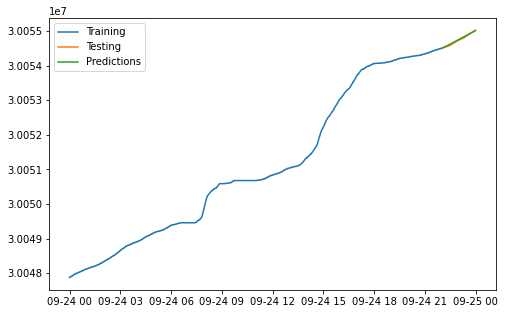

In [16]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Testing")
plt.plot(preds,label='Predictions')
plt.legend()
plt.show()

In [17]:
meanae = metrics.mean_absolute_error(test, preds)
print(meanae)

18.12056962829083


In [18]:
pred = []
for i in range(len(test.shape[0])):
    pred[i]= model.predict(test[0][i])
print(pred)